# The power of dimensionality reduction
We use principal component analysis to reduce the number of variables that need to be fed into a classification algortihm for cancerigenous tumors. We use supervised learning techniques on a dataset containing 30 features describing a tumor on 569 patients, together with a label describing whether the tumor is benign/malign. The code follows the structure:
* **First Part**. A classification algorithm is trained using the original 30 features describing a tumor. We use a decision tree algorithm provided by the library *sklean* to do the job. We assess its accuracy using standard train/test splitting and predifined functions.
* **Second Part**. We perform a principal component analysis on the data, and only retain the first 2 principal components. With these only 2 features we now train a similar decision tree classification algorithm. Accuracy levels similar to the original model that used 30 variables are obtained, even though we have reduced the number of input variables from 30 to 2!

## First Part 

In [103]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [104]:
df = pd.read_csv('breast_dataset.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benign


In [105]:
# We split the data into the input variables X and the output variable y
X = df.drop(columns = ['label'])
y = df['label']

# Standard train/test splitting
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [106]:
# Create the decision tree model and train it usign all 30 features
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

# Evaluate its accuracy
predictions = model.predict(X_test)
accuracy_score(y_test,predictions)

0.9649122807017544

## Second Part

In [107]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_DimReduced = pca.transform(X_train)

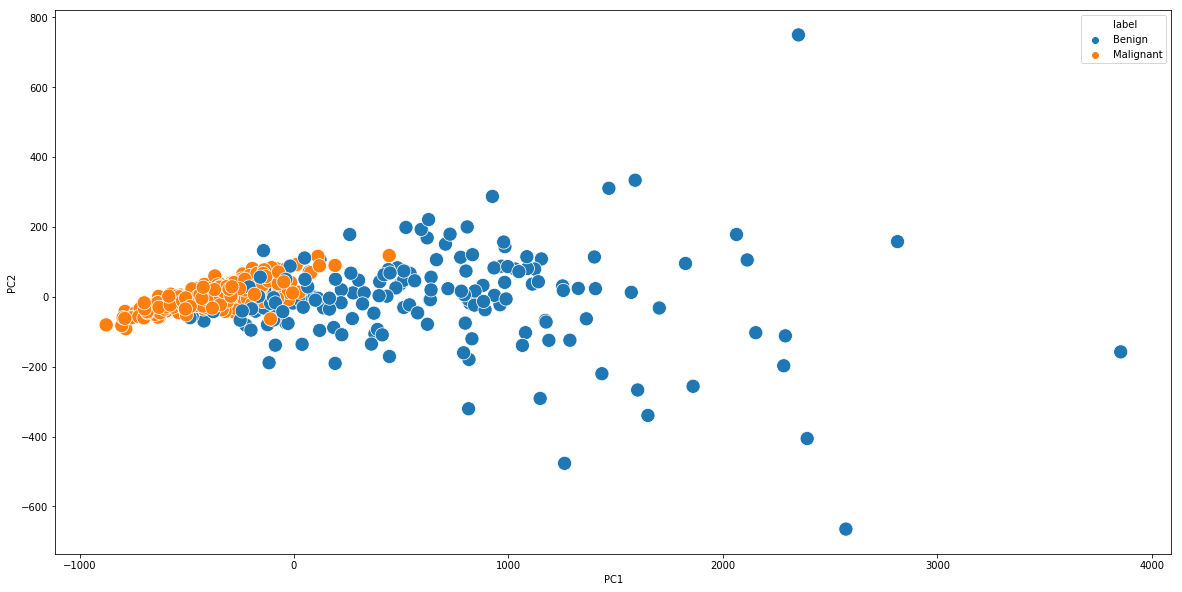

In [108]:
# The following plot shows that the first two principal components do a good job at differentiating benign/malign  
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.xlabel('PC1'), plt.ylabel('PC2')
sns.scatterplot(x=X_train_DimReduced[:,0], y= X_train_DimReduced[:,1], hue=y_train, s=200)

In [109]:
# Create the decision tree model and train it usign just the first 2 principal components
modelReduced = DecisionTreeClassifier()
modelReduced.fit(X_train_DimReduced,y_train)

predictionsReduced = modelReduced.predict(pca.transform(X_test))
accuracy_score(y_test,predictionsReduced)

0.9122807017543859